
---

## 📘 **Podstawowe pojęcia: TP, FP, TN, FN**

| Symbol | Pełna nazwa (ang.) | Opis                                        | Przykład                                      |
| ------ | ------------------ | ------------------------------------------- | --------------------------------------------- |
| **TP** | True Positive      | Prawidłowo przewidziany przypadek pozytywny | Model poprawnie wykrył chorobę u osoby chorej |
| **FP** | False Positive     | Fałszywie przewidziany przypadek pozytywny  | Model uznał zdrową osobę za chorą             |
| **TN** | True Negative      | Prawidłowo przewidziany przypadek negatywny | Model poprawnie uznał osobę zdrową za zdrową  |
| **FN** | False Negative     | Fałszywie przewidziany przypadek negatywny  | Model uznał chorą osobę za zdrową             |

---

## 📊 **Najważniejsze metryki**

| Metryka                            | Wzór                                            | Opis                                                             | Zakres |
| ---------------------------------- | ----------------------------------------------- | ---------------------------------------------------------------- | ------ |
| **Accuracy (dokładność)**          | $(TP + TN) / (TP + TN + FP + FN)   $              | Ogólny odsetek poprawnych predykcji                              | 0–1    |
| **Precision (precyzja)**           | $TP / (TP + FP)  $                                | Jaki procent przewidzianych pozytywów był trafny                 | 0–1    |
| **Recall / Sensitivity (czułość)** | $TP / (TP + FN) $                                 | Jaki procent rzeczywistych pozytywów został znaleziony           | 0–1    |
| **Specificity (swoistość)**        | $TN / (TN + FP) $                                 | Jaki procent rzeczywistych negatywów został poprawnie rozpoznany | 0–1    |
| **F1-score**                       | $2 × (Precision × Recall) / (Precision + Recall) $| Średnia harmoniczna precyzji i czułości                          | $0–1   $ |
| **False Positive Rate (FPR)**      | $FP / (FP + TN)  $                                | Ułamek błędnie wykrytych negatywów                               | $0–1   $|
| **False Negative Rate (FNR)**      | $FN / (FN + TP)  $                                | Ułamek pominiętych pozytywów                                     | $0–1  $  |
| **Balanced Accuracy**              | $(Recall + Specificity) / 2  $                    | Średnia z czułości i swoistości                                  | $0–1$    |

---

## 📉 **Macierz pomyłek (Confusion Matrix)**

To sposób przedstawienia powyższych wyników w formie tabeli:

|                             | **Rzeczywiste: Pozytywne** | **Rzeczywiste: Negatywne** |
| --------------------------- | -------------------------- | -------------------------- |
| **Przewidziane: Pozytywne** | TP (True Positive)         | FP (False Positive)        |
| **Przewidziane: Negatywne** | FN (False Negative)        | TN (True Negative)         |

---

## 💡 **Jak interpretować?**

* **Wysoki recall (czułość)** — mało przypadków pominiętych (FN). Dobrze, jeśli ważne jest wykrycie *wszystkich* pozytywów (np. testy medyczne).
* **Wysoka precision (precyzja)** — mało fałszywych alarmów (FP). Dobrze, jeśli koszt fałszywego alarmu jest wysoki (np. wykrywanie spamu).
* **F1-score** równoważy oba powyższe aspekty.

---

## 📈 **Wizualizacje**

Dodatkowo w analizie modeli często stosuje się:

* **ROC curve (Receiver Operating Characteristic)** – pokazuje zależność między TPR (recall) a FPR.
* **AUC (Area Under Curve)** – pole pod krzywą ROC, im bliżej 1, tym lepszy model.

 


=== Wyniki metryk ===
Accuracy:      0.942
Precision:     0.912
Recall:        0.963
Specificity:   0.924
F1-score:      0.937


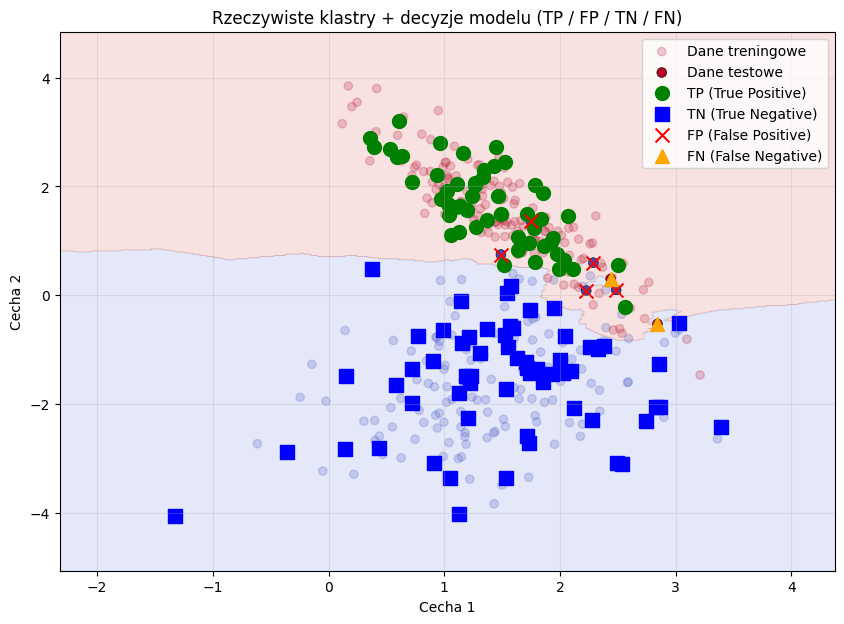

In [8]:
# 📦 Importy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 🔧 Tworzymy dane 2D
X, y = make_classification(
    n_samples=400, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# 🚀 Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🧠 Model KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 Macierz pomyłek i metryki
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)

print("=== Wyniki metryk ===")
print(f"Accuracy:      {accuracy:.3f}")
print(f"Precision:     {precision:.3f}")
print(f"Recall:        {recall:.3f}")
print(f"Specificity:   {specificity:.3f}")
print(f"F1-score:      {f1:.3f}")

# 🔍 Maska na punkty testowe
TP = (y_test == 1) & (y_pred == 1)
TN = (y_test == 0) & (y_pred == 0)
FP = (y_test == 0) & (y_pred == 1)
FN = (y_test == 1) & (y_pred == 0)

# 🌈 Granica decyzyjna
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 🎨 Wizualizacja
plt.figure(figsize=(10, 7))

# Tło – granice decyzyjne modelu
plt.contourf(xx, yy, Z, alpha=0.15, cmap="coolwarm")

# Punkty rzeczywiste (treningowe i testowe)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm",
            alpha=0.2, label='Dane treningowe')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm",
            edgecolors='black', linewidths=0.4, s=50, label='Dane testowe')

# Oznaczenie błędów i trafień dla testowych
plt.scatter(X_test[TP, 0], X_test[TP, 1], c='green', marker='o', s=100, label='TP (True Positive)')
plt.scatter(X_test[TN, 0], X_test[TN, 1], c='blue', marker='s', s=100, label='TN (True Negative)')
plt.scatter(X_test[FP, 0], X_test[FP, 1], c='red', marker='x', s=100, label='FP (False Positive)')
plt.scatter(X_test[FN, 0], X_test[FN, 1], c='orange', marker='^', s=100, label='FN (False Negative)')

# Opis osi i tytuł
plt.title("Rzeczywiste klastry + decyzje modelu (TP / FP / TN / FN)")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.legend(loc='upper right', frameon=True)
plt.grid(True, alpha=0.3)

plt.show()


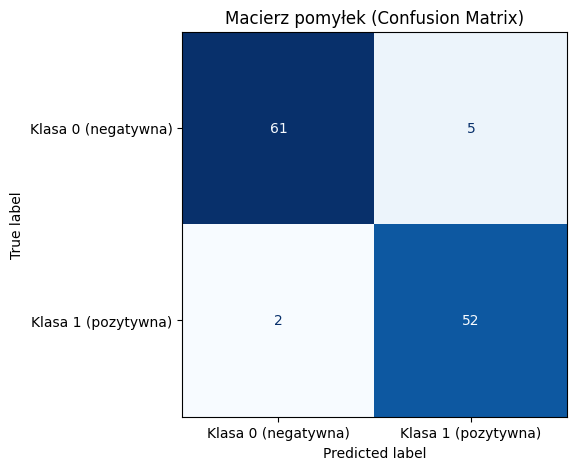


TN (True Negative): 61
FP (False Positive): 5
FN (False Negative): 2
TP (True Positive): 52


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 📊 Obliczenie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)

# 🧩 Wyświetlenie graficzne
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Klasa 0 (negatywna)", "Klasa 1 (pozytywna)"])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Macierz pomyłek (Confusion Matrix)")
plt.show()

# 📋 Dodatkowo: wydrukuj liczby
tn, fp, fn, tp = cm.ravel()
print(f"\nTN (True Negative): {tn}")
print(f"FP (False Positive): {fp}")
print(f"FN (False Negative): {fn}")
print(f"TP (True Positive): {tp}")




## ⚙️ **Dlaczego `scikit-learn` (sklearn) pokazuje ją inaczej?**

W `scikit-learn` konwencja jest taka:

> ➤ **Wiersze** = rzeczywiste klasy (`y_true`)
> ➤ **Kolumny** = przewidywane klasy (`y_pred`)

Czyli:

```text
           Przewidziane
           0     1
Rzecz. 0 [ TN , FP ]
        1 [ FN , TP ]
```

➡️ Lewy górny róg = **TN**, a nie **TP**.
To jest **konwencja matematyczna** (wiersze = dane wejściowe, kolumny = transformacja / wynik).

Natomiast w literaturze klasycznej przyjęto układ bardziej intuicyjny:

> „Wiersze = przewidziane, kolumny = rzeczywiste”.

Dlatego w publikacjach często lewy górny róg to **TP**, a nie **TN**.

---

# 💻 Kod: jak uzyskać klasyczną wersję (TP w lewym górnym rogu)

Poniższy kod:

* generuje klasyczną macierz,
* obraca wyniki `sklearn` o 180° (tak, aby TP był w lewym górnym rogu),
* podpisuje wszystko jak w literaturze.



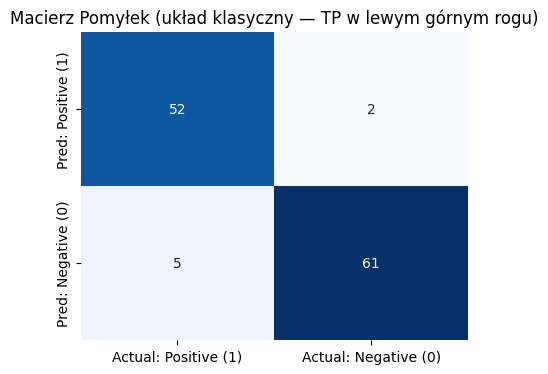

In [10]:
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📊 Obliczamy macierz z sklearn
cm = confusion_matrix(y_test, y_pred)

# 👉 Zamiana orientacji (obrót 180°):
# sklearn: [[TN, FP], [FN, TP]]
# klasyczna: [[TP, FP], [FN, TN]]
cm_classic = cm[::-1, ::-1]

# 🧭 Tworzymy DataFrame z etykietami
import pandas as pd
cm_df = pd.DataFrame(cm_classic,
                     index=['Pred: Positive (1)', 'Pred: Negative (0)'],
                     columns=['Actual: Positive (1)', 'Actual: Negative (0)'])

# 🎨 Wizualizacja
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Macierz Pomyłek (układ klasyczny — TP w lewym górnym rogu)")
plt.show()
 
